In [14]:
import pandas as pd
import numpy as np
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings 
warnings.filterwarnings(action = 'ignore') 
import re
import spacy
nlp = spacy.load('en')
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import pandas, numpy, textblob, string
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
import operator
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
dat = pd.read_csv("dataset_cleaned_full.csv")

In [3]:
all_claims = list(dat['claim'])
len(set(all_claims))

2236

In [4]:
dat.head()

,year,application_number,claim,filed_date,authors,primary_examiner,asst_examiner,patented
0,2014,14146617,system comprising gravity fed container assemb...,"January 2, 2014",['Bierie; William K.'],Boeckmann; Jason\n,,1
1,2014,14146796,steam diffusing apparatus comprising steam inl...,"January 3, 2014",['Taylor; Gregory'],Boeckmann; Jason\n,,1
2,2014,14147703,autonomous self propelled vehicle substantiall...,"January 6, 2014",['Pastoor; Jan Lambertus'],Boeckmann; Jason\n,,1
3,2014,14147733,dual stage fire control system suppressing fir...,"January 6, 2014","['Eckholm; William A.', 'Moran; Dustin C.']",Kim; Christopher\n,,1
4,2014,14148358,sprayer assembly engaging additive source comp...,"January 6, 2014",['Plantz; Jeffrey'],Jonaitis; Justin\n,,1


In [5]:
all_claims = [re.sub(r'\b\w{,2}\b', '', str(claim)) for claim in all_claims]

In [6]:
all_claims

['system comprising gravity fed container assembly comprising container lid configured cover chamber spray coating supply container wherein chamber configured hold spray material filter assembly within chamber configured filter spray material chamber valve coupled filter assembly configured open container couples spray device wherein valve configured move filter assembly first position second position wherein first position blocks filter assembly filtering spray material second position enables filtering spray material wherein container comprises conical bottom wall valve comprises circular portion configured seal conical bottom wall valve comprises base portion coupled circular portion base portion comprising ribs panels configured allow spray material pass valve second position',
 'steam diffusing apparatus comprising steam inlet tube plurality steam dispersion openings adjacent lower end thereof mass filaments surrounding plurality steam dispersion openings solid retaining tube surr

In [7]:
doc = nlp(all_claims[0])
print([(token.text, token.tag_) for token in doc])

[('system', 'NN'), ('comprising', 'VBG'), ('gravity', 'NN'), ('fed', 'VBN'), ('container', 'NN'), ('assembly', 'NN'), ('comprising', 'VBG'), ('container', 'NN'), ('lid', 'NN'), ('configured', 'VBN'), ('cover', 'NN'), ('chamber', 'NN'), ('spray', 'NN'), ('coating', 'VBG'), ('supply', 'NN'), ('container', 'NN'), ('wherein', 'WRB'), ('chamber', 'NN'), ('configured', 'VBN'), ('hold', 'NN'), ('spray', 'NN'), ('material', 'NN'), ('filter', 'NN'), ('assembly', 'NN'), ('within', 'IN'), ('chamber', 'NN'), ('configured', 'VBN'), ('filter', 'NN'), ('spray', 'NN'), ('material', 'NN'), ('chamber', 'NN'), ('valve', 'NN'), ('coupled', 'VBN'), ('filter', 'NN'), ('assembly', 'NN'), ('configured', 'VBD'), ('open', 'JJ'), ('container', 'NN'), ('couples', 'NNS'), ('spray', 'VBP'), ('device', 'NN'), ('wherein', 'WRB'), ('valve', 'NN'), ('configured', 'VBN'), ('move', 'NN'), ('filter', 'NN'), ('assembly', 'NN'), ('first', 'JJ'), ('position', 'NN'), ('second', 'JJ'), ('position', 'NN'), ('wherein', 'WRB'), (

Noun - NN, NNP, NNPS, WP

Adjective - JJ, JJR, JJS, AFX, PDT, PRP$, WDT

Adverb - EX, RB, RBR, RBS, WRB

Verb - BES, HVS, MD, VB, VBD, VBG, VBN, VBP, VBZ

In [8]:
def to_POS(claim):
    doc = nlp(claim)
    claimPOS = [token.tag_ for token in doc]
    POSdict = {e:0 for e in ['Noun', 'Adjective', 'Adverb', 'Verb', 'Other']}
    for i in claimPOS:
        if i == 'NN' or i == 'NNP' or i == 'NNPS' or i == 'WP':
            POSdict['Noun'] += 1
        elif i == 'JJ' or i == 'JJR' or i == 'JJS' or i == 'AFX' or i == 'PDT' or i == 'PRP$' or i == 'WDT':
            POSdict['Adjective'] += 1
        elif i == 'EX' or i == 'RB' or i == 'RBR' or i == 'RBS' or i == 'WRB':
            POSdict['Adverb'] += 1
        elif i == 'BES' or i == 'HVS' or i == 'MD' or i == 'VB' or i == 'VBD' or i == 'VBG' or i == 'VBN' or i == 'VBP' or i == 'VBZ':
            POSdict['Verb'] += 1
        else:
            POSdict['Other'] += 1
    
    return POSdict

In [9]:
to_POS(all_claims[0])

{'Noun': 58, 'Adjective': 12, 'Adverb': 4, 'Verb': 22, 'Other': 5}

Naive Bayes
accuracy 0.6572237960339944
              precision    recall  f1-score   support

           0       0.69      0.07      0.13       126
           1       0.66      0.98      0.79       227

   micro avg       0.66      0.66      0.66       353
   macro avg       0.67      0.53      0.46       353
weighted avg       0.67      0.66      0.55       353

SGD
accuracy 0.6430594900849859
              precision    recall  f1-score   support

           0       0.50      0.05      0.09       126
           1       0.65      0.97      0.78       227

   micro avg       0.64      0.64      0.64       353
   macro avg       0.57      0.51      0.43       353
weighted avg       0.60      0.64      0.53       353

Logistic Regression
accuracy 0.6317280453257791
              precision    recall  f1-score   support

           0       0.49      0.54      0.51       126
           1       0.73      0.68      0.70       227

   micro avg       0.63      0.63      0.63       353
   macro

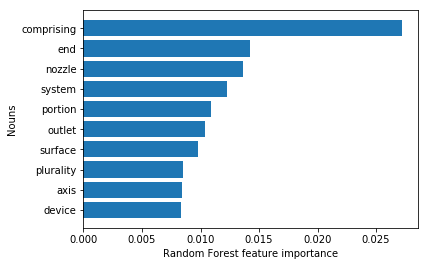

XGBoost
accuracy 0.6912181303116147
              precision    recall  f1-score   support

           0       0.59      0.43      0.50       126
           1       0.73      0.84      0.78       227

   micro avg       0.69      0.69      0.69       353
   macro avg       0.66      0.63      0.64       353
weighted avg       0.68      0.69      0.68       353



In [18]:
all_nouns = []
for claim in all_claims:
    doc = nlp(claim)
    claimPOS = [(token.text, token.tag_) for token in doc]
    temp_list = []
    for i in claimPOS:
        if i[1] == 'NN' or i[1] == 'NNP' or i[1] == 'NNPS' or i[1] == 'WP':
            temp_list.append(i[0])
            
    all_nouns.append(temp_list)
    
all_nouns2 = []
for i in all_nouns:
    all_nouns2.append(' '.join(i))
    
noun_df = pd.DataFrame(all_nouns2, columns=['nouns'])
noun_df['patented'] = dat['patented']
noun_df['nouns'].replace('', np.nan, inplace=True)
noun_df['nouns'].replace('nan', np.nan, inplace=True)

noun_df.dropna(subset=['nouns'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(noun_df['nouns'],noun_df['patented'], 
                                                                    test_size=0.15, random_state=1,stratify=noun_df['patented'])

my_clusters = list(set(dat['patented']))
my_clusters = list(map(str, my_clusters))
cluster_acc = []

## NB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
nb = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), min_df = 5, max_df = 0.9)),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
print ('Naive Bayes')
print('accuracy %s' % accuracy_score(y_pred, y_test))
#print('ROC-AUC score: ', roc_auc_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_clusters))
cluster_acc.append(accuracy_score(y_pred, y_test))
###########################################################
## SVM
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), min_df = 5, max_df = 0.9)),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

#%%time

y_pred = sgd.predict(X_test)
print ("SGD")
print('accuracy %s' % accuracy_score(y_pred, y_test))
# print('ROC-AUC score: ', roc_auc_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_clusters))
cluster_acc.append(accuracy_score(y_pred, y_test))

###########################################################
##LR
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), min_df = 5, max_df = 0.9)),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)
print ("Logistic Regression")
print('accuracy %s' % accuracy_score(y_pred, y_test))
# print('ROC-AUC score: ', roc_auc_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_clusters))
cluster_acc.append(accuracy_score(y_pred, y_test))



###########################################################
##RF
from sklearn.ensemble import RandomForestClassifier
randf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), min_df = 5, max_df = 0.9)),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=500,random_state=1)),
               ])  
randf.fit(X_train, y_train)

#%%time

y_pred = randf.predict(X_test)
print ("Random Forest")
print('accuracy %s' % accuracy_score(y_pred, y_test))
# print('ROC-AUC score: ', roc_auc_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_clusters))
cluster_acc.append(accuracy_score(y_pred, y_test))

top_10_idx = np.argsort(randf.steps[2][1].feature_importances_)[-10:]
top_10_values = [randf.steps[2][1].feature_importances_[i] for i in top_10_idx]

top_features = []
for i in range(10):
    top_features.append(randf.steps[0][1].get_feature_names()[top_10_idx[i]])
    
print("Top 10 features:")
print(top_features[::-1])
plt.xlabel("Random Forest feature importance")
plt.ylabel("Nouns")
plt.barh(y=top_features, width=top_10_values)
plt.show()

###########################################################
##XGB

xgb = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), min_df = 5, max_df = 0.9)),
                ('tfidf', TfidfTransformer()),
                ('clf', XGBClassifier(max_depth=5, n_estimators=300)),
               ])
xgb.fit(X_train, y_train)

#%%time

y_pred = xgb.predict(X_test)
print ("XGBoost")
print('accuracy %s' % accuracy_score(y_pred, y_test))
# print('ROC-AUC score: ', roc_auc_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_clusters))
cluster_acc.append(accuracy_score(y_pred, y_test))

In [19]:
pickle.dump(xgb, open('xgb.sav', 'wb'))
pickle.dump(randf, open('randf.sav', 'wb'))
pickle.dump(logreg, open('logreg.sav', 'wb'))
pickle.dump(sgd, open('sgd.sav', 'wb'))
pickle.dump(nb, open('nb.sav', 'wb'))

Random Forest
accuracy 0.7138810198300283
              precision    recall  f1-score   support

           0       0.78      0.28      0.41       126
           1       0.70      0.96      0.81       227

   micro avg       0.71      0.71      0.71       353
   macro avg       0.74      0.62      0.61       353
weighted avg       0.73      0.71      0.67       353

Top 10 features:
['comprising', 'nozzle', 'end', 'system', 'outlet', 'surface', 'portion', 'flow', 'inlet', 'plurality']


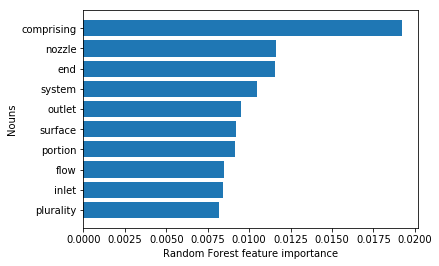

In [15]:
randf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), min_df = 5, max_df = 0.9)),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=500,random_state=1)),
               ])  
randf.fit(X_train, y_train)

#%%time

y_pred = randf.predict(X_test)
print ("Random Forest")
print('accuracy %s' % accuracy_score(y_pred, y_test))
# print('ROC-AUC score: ', roc_auc_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_clusters))
cluster_acc.append(accuracy_score(y_pred, y_test))

top_10_idx = np.argsort(randf.steps[2][1].feature_importances_)[-10:]
top_10_values = [randf.steps[2][1].feature_importances_[i] for i in top_10_idx]

top_features = []
for i in range(10):
    top_features.append(randf.steps[0][1].get_feature_names()[top_10_idx[i]])
    
print("Top 10 features:")
print(top_features[::-1])
plt.xlabel("Random Forest feature importance")
plt.ylabel("Nouns")
plt.barh(y=top_features, width=top_10_values)
plt.show()

pickle.dump(randf, open('randf.sav', 'wb'))

Naive Bayes
accuracy 0.6438746438746439
ROC-AUC score:  0.5694444444444444
              precision    recall  f1-score   support

           0       0.48      0.10      0.17       124
           1       0.66      0.94      0.77       227

   micro avg       0.64      0.64      0.64       351
   macro avg       0.57      0.52      0.47       351
weighted avg       0.60      0.64      0.56       351

SGD
accuracy 0.6467236467236467
ROC-AUC score:  0.5782674772036474
              precision    recall  f1-score   support

           0       0.50      0.09      0.15       124
           1       0.66      0.95      0.78       227

   micro avg       0.65      0.65      0.65       351
   macro avg       0.58      0.52      0.46       351
weighted avg       0.60      0.65      0.56       351

Logistic Regression
accuracy 0.6666666666666666
ROC-AUC score:  0.6273267326732673
              precision    recall  f1-score   support

           0       0.53      0.44      0.48       124
           1

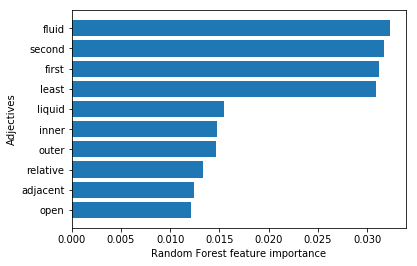

XGBoost
accuracy 0.6723646723646723
ROC-AUC score:  0.6334320967611008
              precision    recall  f1-score   support

           0       0.55      0.43      0.48       124
           1       0.72      0.81      0.76       227

   micro avg       0.67      0.67      0.67       351
   macro avg       0.63      0.62      0.62       351
weighted avg       0.66      0.67      0.66       351



In [11]:
all_nouns = []
for claim in all_claims:
    doc = nlp(claim)
    claimPOS = [(token.text, token.tag_) for token in doc]
    temp_list = []
    for i in claimPOS:
        #JJ, JJR, JJS, AFX, PDT, PRP$, WDT
        if i[1] == 'JJ' or i[1] == 'JJR' or i[1] == 'JJS' or i[1] == 'AFX' or i[1] == 'PDT' or i[1] == 'PRP$' or i[1] == 'WDT'  :
            temp_list.append(i[0])
            
    all_nouns.append(temp_list)
    
all_nouns2 = []
for i in all_nouns:
    all_nouns2.append(' '.join(i))
    
noun_df = pd.DataFrame(all_nouns2, columns=['nouns'])
noun_df['patented'] = dat['patented']
noun_df['nouns'].replace('', np.nan, inplace=True)
noun_df['nouns'].replace('nan', np.nan, inplace=True)

noun_df.dropna(subset=['nouns'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(noun_df['nouns'],noun_df['patented'], 
                                                                    test_size=0.15, random_state=1,stratify=noun_df['patented'])

my_clusters = list(set(dat['patented']))
my_clusters = list(map(str, my_clusters))
cluster_acc = []

## NB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
nb = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), min_df = 5, max_df = 0.9)),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
print ('Naive Bayes')
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('ROC-AUC score: ', roc_auc_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_clusters))
cluster_acc.append(accuracy_score(y_pred, y_test))
###########################################################
## SVM
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), min_df = 5, max_df = 0.9)),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

#%%time

y_pred = sgd.predict(X_test)
print ("SGD")
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('ROC-AUC score: ', roc_auc_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_clusters))
cluster_acc.append(accuracy_score(y_pred, y_test))

###########################################################
##LR
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), min_df = 5, max_df = 0.9)),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)
print ("Logistic Regression")
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('ROC-AUC score: ', roc_auc_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_clusters))
cluster_acc.append(accuracy_score(y_pred, y_test))



###########################################################
##RF
from sklearn.ensemble import RandomForestClassifier
randf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), min_df = 5, max_df = 0.9)),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=100,random_state=1)),
               ])  
randf.fit(X_train, y_train)

#%%time

y_pred = randf.predict(X_test)
print ("Random Forest")
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('ROC-AUC score: ', roc_auc_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_clusters))
cluster_acc.append(accuracy_score(y_pred, y_test))

top_10_idx = np.argsort(randf.steps[2][1].feature_importances_)[-10:]
top_10_values = [randf.steps[2][1].feature_importances_[i] for i in top_10_idx]

top_features = []
for i in range(10):
    top_features.append(randf.steps[0][1].get_feature_names()[top_10_idx[i]])
    
print("Top 10 features:")
print(top_features[::-1])
plt.xlabel("Random Forest feature importance")
plt.ylabel("Adjectives")
plt.barh(y=top_features, width=top_10_values)
plt.show()

###########################################################
##XGB

xgb = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), min_df = 5, max_df = 0.9)),
                ('tfidf', TfidfTransformer()),
                ('clf', XGBClassifier(max_depth=5, n_estimators=300)),
               ])
xgb.fit(X_train, y_train)

#%%time

y_pred = xgb.predict(X_test)
print ("XGBoost")
print('accuracy %s' % accuracy_score(y_pred, y_test))
print('ROC-AUC score: ', roc_auc_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_clusters))
cluster_acc.append(accuracy_score(y_pred, y_test))

## Nouns + Adjectives

Naive Bayes
accuracy 0.6628895184135978
              precision    recall  f1-score   support

           0       0.73      0.09      0.16       126
           1       0.66      0.98      0.79       227

   micro avg       0.66      0.66      0.66       353
   macro avg       0.70      0.53      0.47       353
weighted avg       0.69      0.66      0.56       353

SGD
accuracy 0.6572237960339944
              precision    recall  f1-score   support

           0       0.73      0.06      0.12       126
           1       0.65      0.99      0.79       227

   micro avg       0.66      0.66      0.66       353
   macro avg       0.69      0.53      0.45       353
weighted avg       0.68      0.66      0.55       353

Logistic Regression
accuracy 0.6345609065155807
              precision    recall  f1-score   support

           0       0.49      0.54      0.51       126
           1       0.73      0.69      0.71       227

   micro avg       0.63      0.63      0.63       353
   macro

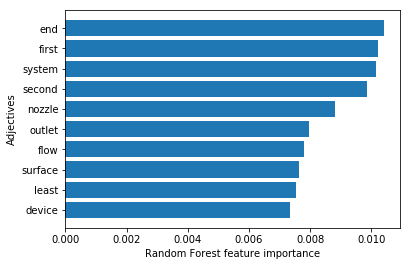

XGBoost
accuracy 0.7110481586402266
              precision    recall  f1-score   support

           0       0.63      0.45      0.53       126
           1       0.74      0.85      0.79       227

   micro avg       0.71      0.71      0.71       353
   macro avg       0.69      0.65      0.66       353
weighted avg       0.70      0.71      0.70       353



In [12]:
all_nouns = []
for claim in all_claims:
    doc = nlp(claim)
    claimPOS = [(token.text, token.tag_) for token in doc]
    temp_list = []
    for i in claimPOS:
        #JJ, JJR, JJS, AFX, PDT, PRP$, WDT
        if i[1] == 'JJ' or i[1] == 'JJR' or i[1] == 'JJS' or i[1] == 'AFX' or i[1] == 'PDT' or i[1] == 'PRP$' or i[1] == 'WDT' or i[1] == 'NN' or i[1] == 'NNP' or i[1] == 'NNPS' or i[1] == 'WP':
            if i[0] != 'comprising':
                temp_list.append(i[0])
            
    all_nouns.append(temp_list)
    
all_nouns2 = []
for i in all_nouns:
    all_nouns2.append(' '.join(i))
    
noun_df = pd.DataFrame(all_nouns2, columns=['nouns'])
noun_df['patented'] = dat['patented']
noun_df['nouns'].replace('', np.nan, inplace=True)
noun_df['nouns'].replace('nan', np.nan, inplace=True)

noun_df.dropna(subset=['nouns'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(noun_df['nouns'],noun_df['patented'], 
                                                                    test_size=0.15, random_state=1,stratify=noun_df['patented'])

my_clusters = list(set(dat['patented']))
my_clusters = list(map(str, my_clusters))
cluster_acc = []

## NB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
nb = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), min_df = 5, max_df = 0.9)),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)
print ('Naive Bayes')
print('accuracy %s' % accuracy_score(y_pred, y_test))
# print('ROC-AUC score: ', roc_auc_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_clusters))
cluster_acc.append(accuracy_score(y_pred, y_test))
###########################################################
## SVM
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), min_df = 5, max_df = 0.9)),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

#%%time

y_pred = sgd.predict(X_test)
print ("SGD")
print('accuracy %s' % accuracy_score(y_pred, y_test))
# print('ROC-AUC score: ', roc_auc_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_clusters))
cluster_acc.append(accuracy_score(y_pred, y_test))

###########################################################
##LR
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), min_df = 5, max_df = 0.9)),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

#%%time

y_pred = logreg.predict(X_test)
print ("Logistic Regression")
print('accuracy %s' % accuracy_score(y_pred, y_test))
# print('ROC-AUC score: ', roc_auc_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_clusters))
cluster_acc.append(accuracy_score(y_pred, y_test))



###########################################################
##RF
from sklearn.ensemble import RandomForestClassifier
randf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), min_df = 5, max_df = 0.9)),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=100,random_state=1)),
               ])  
randf.fit(X_train, y_train)

#%%time

y_pred = randf.predict(X_test)
print ("Random Forest")
print('accuracy %s' % accuracy_score(y_pred, y_test))
# print('ROC-AUC score: ', roc_auc_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_clusters))
cluster_acc.append(accuracy_score(y_pred, y_test))

top_10_idx = np.argsort(randf.steps[2][1].feature_importances_)[-10:]
top_10_values = [randf.steps[2][1].feature_importances_[i] for i in top_10_idx]

top_features = []
for i in range(10):
    top_features.append(randf.steps[0][1].get_feature_names()[top_10_idx[i]])
    
print("Top 10 features:")
print(top_features[::-1])
plt.xlabel("Random Forest feature importance")
plt.ylabel("Adjectives")
plt.barh(y=top_features, width=top_10_values)
plt.show()

###########################################################
##XGB

xgb = Pipeline([('vect', CountVectorizer(ngram_range=(1,1), min_df = 5, max_df = 0.9)),
                ('tfidf', TfidfTransformer()),
                ('clf', XGBClassifier(max_depth=5, n_estimators=300)),
               ])
xgb.fit(X_train, y_train)

#%%time

y_pred = xgb.predict(X_test)
print ("XGBoost")
print('accuracy %s' % accuracy_score(y_pred, y_test))
# print('ROC-AUC score: ', roc_auc_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_clusters))
cluster_acc.append(accuracy_score(y_pred, y_test))

In [21]:
pickle.dump(xgb, open('xgb.sav', 'wb'))
pickle.dump(randf, open('randf.sav', 'wb'))
pickle.dump(logreg, open('logreg.sav', 'wb'))
pickle.dump(sgd, open('sgd.sav', 'wb'))
pickle.dump(nb, open('nb.sav', 'wb'))

In [34]:
loaded_model = pickle.load(open('randf.sav', 'rb'))

In [39]:
loaded_model.predict_proba(["system first"])

array([[0.74, 0.26]])

In [40]:
loaded_model.predict_proba(["system first"])[0][1]

0.26